In [1]:
# Imports libaries
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import warnings

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
warnings.filterwarnings('ignore')

## Step 1: Let begin by exploying our dataset

In [2]:
dataset_path = r'AI_ML_Assessment\swarm_train_data.csv'
train_df = pd.read_csv(dataset_path, low_memory=False)

print(train_df.shape)
#Let's check the first five row of our dataset
train_df.head(5)

(18013, 2401)


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,nS1,x2,y2,xVel2,yVel2,xA2,yA2,xS2,yS2,xC2,yC2,nAC2,nS2,x3,y3,xVel3,yVel3,xA3,yA3,xS3,yS3,xC3,yC3,nAC3,nS3,x4,y4,xVel4,yVel4,xA4,yA4,xS4,yS4,xC4,yC4,nAC4,nS4,x5,y5,xVel5,yVel5,xA5,yA5,xS5,yS5,xC5,yC5,nAC5,nS5,...,y196,xVel196,yVel196,xA196,yA196,xS196,yS196,xC196,yC196,nAC196,nS196,x197,y197,xVel197,yVel197,xA197,yA197,xS197,yS197,xC197,yC197,nAC197,nS197,x198,y198,xVel198,yVel198,xA198,yA198,xS198,yS198,xC198,yC198,nAC198,nS198,x199,y199,xVel199,yVel199,xA199,yA199,xS199,yS199,xC199,yC199,nAC199,nS199,x200,y200,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
0,-489.28,-658.11,2.51,3.28,0.0,0.0,-0.26,0.35,0.93,-0.37,45,17,-1009.24,380.07,-2.83,-1.86,0.0,0.0,0.40,-0.19,-0.88,0.47,112,33,-1017.81,410.42,-2.91,2.47,0.0,0.0,0.25,0.36,-0.66,-0.75,112,37,-486.08,-660.20,-0.50,-3.48,0.0,0.0,-0.15,0.41,0.65,-0.76,45,21,499.77,650.58,-1.79,3.12,0.0,0.0,-0.19,0.40,0.87,-0.49,37,13,...,617.53,1.15,-3.13,0.0,0.0,-0.02,-0.44,0.02,1.00,37,17,-1037.88,416.39,-0.96,-1.76,0.0,0.0,-0.19,0.40,0.35,-0.94,112,29,-467.98,-668.21,-1.82,3.24,0.0,0.0,0.44,0.00,-0.94,0.35,45,22,502.45,658.55,0.12,-2.93,0.0,0.0,-0.06,0.44,0.61,-0.79,37,5,-1010.41,398.19,1.60,-4.17,0.0,0.0,0.33,0.29,-0.87,-0.50,112,40,1
1,-540.61,-670.93,-1.02,-4.76,0.0,0.0,-0.06,0.44,0.24,-0.97,45,2,-1108.55,453.21,2.96,-2.65,0.0,0.0,-0.37,-0.24,0.81,0.59,112,33,-1103.46,474.24,1.14,-2.29,0.0,0.0,-0.15,0.41,0.60,-0.80,112,34,-494.13,-733.68,0.66,-2.98,0.0,0.0,0.39,-0.20,-0.92,0.40,45,5,538.94,585.77,4.43,-1.31,0.0,0.0,0.22,-0.38,-0.63,0.78,37,11,...,572.02,3.06,0.52,0.0,0.0,-0.37,-0.24,0.59,0.81,37,3,-1180.26,-138.40,0.51,3.53,0.0,0.0,0.00,0.00,0.14,0.99,108,0,-504.50,-716.51,-1.82,-2.85,0.0,0.0,0.38,0.22,-0.99,-0.12,45,11,492.70,604.09,-1.75,1.29,0.0,0.0,-0.42,0.12,1.00,0.09,37,6,-1076.23,504.68,-1.37,-4.43,0.0,0.0,-0.15,0.41,-0.46,-0.89,112,9,1
2,379.83,-521.18,1.86,7.31,0.0,0.0,0.00,0.00,0.00,0.00,1,0,-150.48,-865.12,-3.40,8.45,0.0,0.0,0.00,0.00,0.00,0.00,4,0,1147.27,-336.29,2.47,-7.49,0.0,0.0,-0.48,0.88,0.00,0.00,6,1,1389.61,-305.15,4.89,6.94,0.0,0.0,0.00,0.00,0.00,0.00,2,0,-44.35,-823.24,-2.28,7.21,0.0,0.0,0.00,0.00,0.00,0.00,2,0,...,-675.91,8.22,4.28,0.0,0.0,0.00,0.00,0.00,0.00,3,0,824.23,-45.78,1.65,7.97,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-1313.09,-886.29,8.22,3.46,0.0,0.0,0.00,0.00,0.00,0.00,3,0,-1378.23,-802.19,6.29,7.16,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-1038.59,91.30,7.96,1.33,0.0,0.0,0.00,0.00,0.00,0.00,4,0,1
3,888.21,-146.53,-2.67,-18.10,0.0,0.0,0.00,0.00,0.00,0.00,3,0,624.18,-83.83,-1.79,9.57,0.0,0.0,0.00,0.00,0.00,0.00,4,0,339.49,685.16,-12.10,-9.18,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-487.34,271.33,-6.15,-12.80,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-680.20,-752.29,5.67,-4.07,0.0,0.0,0.00,0.00,0.00,0.00,61,0,...,-308.63,-9.56,-8.82,0.0,0.0,0.00,0.00,0.00,0.00,6,0,1320.20,503.95,7.04,-6.85,0.0,0.0,0.00,0.00,0.00,0.00,0,0,413.66,-996.01,0.35,-12.97,0.0,0.0,0.00,0.00,0.00,0.00,40,1,1197.72,-590.32,-11.07,-3.72,0.0,0.0,0.00,0.00,0.00,0.00,7,0,703.44,187.44,1.04,-2.19,0.0,0.0,0.00,0.00,0.00,0.00,3,1,0
4,-452.43,-632.15,2.66,-2.63,0.0,0.0,-0.12,0.42,0.01,-1.00,45,5,-998.40,387.08,1.87,-4.29,0.0,0.0,0.42,-0.12,-0.86,0.50,112,40,-1013.45,388.73,2.01,0.17,0.0,0.0,0.09,-0.43,-0.38,0.93,112,49,-425.48,-705.09,0.52,2.27,0.0,0.0,0.31,-0.31,-0.68,0.73,45,6,580.06,551.02,-2.06,-0.57,0.0,0.0,0.22,-0.38,-0.02,1.00,37,12,...,571.86,0.23,-3.62,0.0,0.0,0.37,0.23,0.89,-0.46,37,12,-1038.16,416.16,1.42,2.26,0.0,0.0,-0.38,0.22,0.87,-0.49,112,34,-434.37,-684.72,0.61,2.09,0.0,0.0,0.31,0.32,-0.89,0.46,45,13,561.13,590.30,0.54,3.63,0.0,0.0,-0.39,0.19,0.74,-0.67,37,10,-927.32,415.74,-3.35,2.54,0.0,0.0,0.00,0.00,-1.00,-0.10,112,0,1


From the above, we have a dataset of shape(18013, 2401)

### Check the number of rows in our dataset

In [3]:
num_rows = train_df.shape[0]
# len(dataframe)
print(num_rows)

18013


### Check the number of columns in our dataset

In [4]:
num_cols = train_df.shape[1]
# len(dataframe.columns)
print(num_cols)

2401


### We have a column with a datatype of object, we need to convert that to numerical value

In [5]:
train_df.select_dtypes(include=['object'])
train_df['x1'][12649]
train_df['x1'] = pd.to_numeric(train_df.x1, errors='coerce').fillna(0).astype(float)

#Adjust the class label

train_df = train_df.rename({'Class ': 'Class'}, axis=1)

## Step 2: Prepare the dataset for training
We need to convert the data from the Pandas dataframe into a PyTorch tensors for training.

In [6]:
input_cols = train_df.columns[train_df.columns!='Class']
input_cols

Index(['x1', 'y1', 'xVel1', 'yVel1', 'xA1', 'yA1', 'xS1', 'yS1', 'xC1', 'yC1',
       ...
       'xVel200', 'yVel200', 'xA200', 'yA200', 'xS200', 'yS200', 'xC200',
       'yC200', 'nAC200', 'nS200'],
      dtype='object', length=2400)

In [7]:
output_cols = [train_df.columns[-1]]
print(output_cols)

['Class']


#### First convert all columns to numpy array

In [14]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)

    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array


In [15]:
inputs_array, targets_array = dataframe_to_arrays(train_df)
# inputs_array, targets_array

#### Then convert data to Tensor dataset

In [16]:
inputs = torch.tensor(inputs_array).type(torch.float32)
targets = torch.tensor(targets_array).type(torch.float32)
dataset = TensorDataset(inputs, targets)

#### Here I simply split the data into train and validation in the ration of 80:20

In [17]:
val_percent = 0.2 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_ds, val_ds = random_split(dataset, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

#### Select a batch size and add out tensors to a dataloader

In [18]:
batch_size = 10
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Step 3: Create a Logistic Regression Model


Here we simply have a feedforward model with just a single layer, It takes in input features of 2400 and output 0 or 1 (Non-flocking or Flocking)

In [19]:
input_size = len(input_cols)
num_classes = 2
input_size,num_classes

(2400, 2)

In [20]:
class SwarmModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)               
        
    def forward(self, xb):
        out = self.linear (xb)                       
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.cross_entropy(out, torch.max(targets,1)[1])                           # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.cross_entropy(out, torch.max(targets,1)[1])
        acc = accuracy(out, targets)#     
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch+1, result['val_loss'],result['val_acc']))

    


Let us create a model using the SwarmModel class. You may need to come back later and re-run the next cell to reinitialize the model, in case the loss becomes nan or infinity.

In [21]:
model = SwarmModel()

#Let's check out the weights and biases of the model using model.paramet
list(model.parameters())

[Parameter containing:
 tensor([[-0.0129,  0.0015,  0.0050,  ..., -0.0199,  0.0031, -0.0021],
         [ 0.0002, -0.0093, -0.0092,  ...,  0.0061,  0.0131,  0.0094]],
        requires_grad=True), Parameter containing:
 tensor([-0.0034, -0.0176], requires_grad=True)]

# Step 4: Train the model to fit the data

In [22]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [23]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result,epochs)
        history.append(result)
    return history

In [24]:
evaluate(model, val_loader)

{'val_loss': 131.2275390625, 'val_acc': 5.03933572769165}

In [25]:
epochs = 100
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 288.4337, val_acc: 4.9091
Epoch [40], val_loss: 288.4337, val_acc: 4.9091
Epoch [60], val_loss: 288.4337, val_acc: 4.9091
Epoch [80], val_loss: 288.4337, val_acc: 4.9091
Epoch [100], val_loss: 288.4337, val_acc: 4.9091


### Let plot a graph to see how loss grows

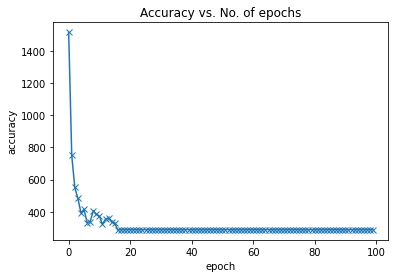

In [27]:
accuracies = [r['val_loss'] for r in history1]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Let's save our model to dict

In [28]:
torch.save(model.state_dict(), 'swarm-logistic.pth')

In [29]:
##You can load the pretrained model using

model2 = model.load_state_dict(torch.load('swarm-logistic.pth'))

In [ ]:
evaluate(model2, val_loader)